In [1]:
import pandas as pd
df = pd.read_csv('Islander_data.csv')
df.head()

first_name last_name  age Happy_Sad_group  Dosage Drug  Mem_Score_Before  \
0    Bastian  Carrasco   25               H       1    A              63.5   
1       Evan  Carrasco   52               S       1    A              41.6   
2  Florencia  Carrasco   29               H       1    A              59.7   
3      Holly  Carrasco   50               S       1    A              51.7   
4     Justin  Carrasco   52               H       1    A              47.0   

   Mem_Score_After  Diff  
0             61.2  -2.3  
1             40.7  -0.9  
2             55.1  -4.6  
3             51.2  -0.5  
4             47.1   0.1

In [2]:
#Let's get rid of those names since we won't need them.
df = df.drop(columns=['first_name','last_name'])
df

age Happy_Sad_group  Dosage Drug  Mem_Score_Before  Mem_Score_After  Diff
0     25               H       1    A              63.5             61.2  -2.3
1     52               S       1    A              41.6             40.7  -0.9
2     29               H       1    A              59.7             55.1  -4.6
3     50               S       1    A              51.7             51.2  -0.5
4     52               H       1    A              47.0             47.1   0.1
..   ...             ...     ...  ...               ...              ...   ...
193   52               H       3    T              71.3             74.3   3.0
194   41               S       3    T              72.5             70.4  -2.1
195   54               S       3    T              30.8             33.1   2.3
196   40               H       3    T              53.6             53.8   0.2
197   32               S       3    T              43.1             42.1  -1.0

[198 rows x 7 columns]

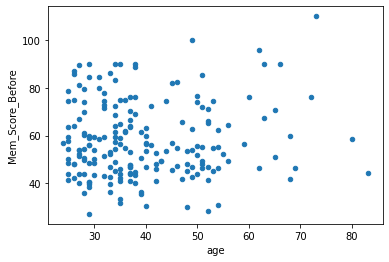

In [3]:
#First, let's see how it will look like plotted out.
import matplotlib.pyplot as plt
df.plot.scatter('age','Mem_Score_Before')
plt.show()

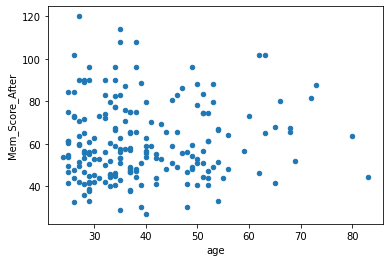

In [4]:
df.plot.scatter('age','Mem_Score_After')
plt.show()

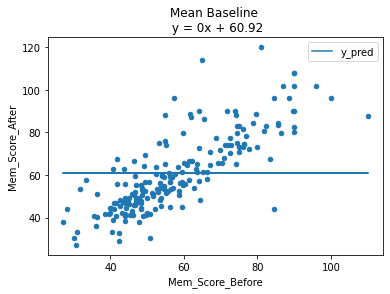

In [5]:
#You'd know what would be good to have? Mean Baseline!
ax = df.plot.scatter('Mem_Score_Before', 'Mem_Score_After')
mean = df['Mem_Score_After'].mean()
df['y_pred'] = mean
title = f'Mean Baseline \n y = 0x + {mean:.2f}'
df.plot('Mem_Score_Before', 'y_pred', ax=ax, title=title);

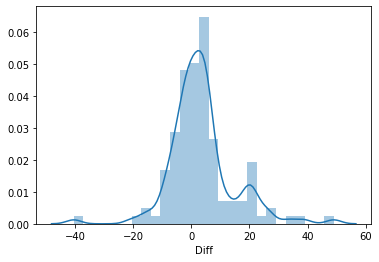

In [6]:
#What do we need for predictive modeling? Trains, test and validation data!
from sklearn.model_selection import train_test_split
train,test=train_test_split(df, train_size=0.8, test_size=0.2)
train,val = train_test_split(train,train_size=0.8,test_size=0.2)
target = 'Mem_Score_After'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]
import seaborn as sns
#Now, on a previous assignment, we ran a distribution plot on the dataframe and it wasn't skewed.
#In order to see if it split properly, it should be still mid-focused if we ran it on the train.
sns.distplot(train['Diff']);

In [7]:
#I chose this particular dataset because it's squeaky clean;
#despite it being relatively small, it shouldn't have any NaN's.
#It always doesn't have any outliers, at least none that have no importance.
train.isnull().sum()

age                 0
Happy_Sad_group     0
Dosage              0
Drug                0
Mem_Score_Before    0
Mem_Score_After     0
Diff                0
y_pred              0
dtype: int64

In [8]:
#I believe that another reason why there is no real 'outlier' in this data
#would be that Mem_Score_Before, Mem_Score_After, and Diff all tie in together,
#making every piece of data essential and important.
#There is also very strong correlation between the mood and the difference.
train.describe(include='all')

age Happy_Sad_group      Dosage Drug  Mem_Score_Before  \
count   126.000000             126  126.000000  126        126.000000   
unique         NaN               2         NaN    3               NaN   
top            NaN               S         NaN    S               NaN   
freq           NaN              65         NaN   43               NaN   
mean     39.357143             NaN    2.007937  NaN         58.067460   
std      12.350523             NaN    0.834228  NaN         15.188995   
min      24.000000             NaN    1.000000  NaN         27.200000   
25%      29.000000             NaN    1.000000  NaN         46.925000   
50%      36.000000             NaN    2.000000  NaN         55.800000   
75%      47.750000             NaN    3.000000  NaN         66.850000   
max      83.000000             NaN    3.000000  NaN        100.000000   

        Mem_Score_After        Diff        y_pred  
count        126.000000  126.000000  1.260000e+02  
unique              NaN         NaN           NaN  
top                 NaN         NaN           NaN  
freq                NaN         NaN           NaN  
mean          61.606349    3.538889  6.092222e+01  
std           17.436783   11.211080  7.133792e-15  
min           28.900000  -40.400000  6.092222e+01  
25%           48.475000   -2.525000  6.092222e+01  
50%           57.050000    2.250000  6.092222e+01  
75%           74.300000    6.000000  6.092222e+01  
max          114.000000   49.000000  6.092222e+01

In [9]:
#For clarity reasons, let's rename the letters in the drug column to what they are standing for.
#This way, we won't have to constantly keep referring to the key.
train['Drug']=train['Drug'].replace({'S':'Sugar','T':'Triazolam','A':'Alprazolam'})
train

age Happy_Sad_group  Dosage        Drug  Mem_Score_Before  \
161   54               H       2   Triazolam              55.2   
163   42               H       2   Triazolam              52.7   
96    30               S       2       Sugar              48.7   
48    35               H       3  Alprazolam              65.0   
22    50               S       1  Alprazolam              55.7   
..   ...             ...     ...         ...               ...   
130   43               S       3       Sugar              49.3   
47    36               H       3  Alprazolam              61.8   
150   37               S       1   Triazolam              64.2   
137   62               H       1   Triazolam              96.0   
25    40               H       2  Alprazolam              47.0   

     Mem_Score_After  Diff     y_pred  
161             51.7  -3.5  60.922222  
163             53.3   0.6  60.922222  
96              52.9   4.2  60.922222  
48             114.0  49.0  60.922222  
22              52.7  -3.0  60.922222  
..               ...   ...        ...  
130             52.7   3.4  60.922222  
47              87.4  25.6  60.922222  
150             57.3  -6.9  60.922222  
137            102.0   6.0  60.922222  
25              55.5   8.5  60.922222  

[126 rows x 8 columns]

In [10]:
train.describe(include='all')

age Happy_Sad_group      Dosage        Drug  Mem_Score_Before  \
count   126.000000             126  126.000000         126        126.000000   
unique         NaN               2         NaN           3               NaN   
top            NaN               S         NaN  Alprazolam               NaN   
freq           NaN              65         NaN          43               NaN   
mean     39.357143             NaN    2.007937         NaN         58.067460   
std      12.350523             NaN    0.834228         NaN         15.188995   
min      24.000000             NaN    1.000000         NaN         27.200000   
25%      29.000000             NaN    1.000000         NaN         46.925000   
50%      36.000000             NaN    2.000000         NaN         55.800000   
75%      47.750000             NaN    3.000000         NaN         66.850000   
max      83.000000             NaN    3.000000         NaN        100.000000   

        Mem_Score_After        Diff        y_pred  
count        126.000000  126.000000  1.260000e+02  
unique              NaN         NaN           NaN  
top                 NaN         NaN           NaN  
freq                NaN         NaN           NaN  
mean          61.606349    3.538889  6.092222e+01  
std           17.436783   11.211080  7.133792e-15  
min           28.900000  -40.400000  6.092222e+01  
25%           48.475000   -2.525000  6.092222e+01  
50%           57.050000    2.250000  6.092222e+01  
75%           74.300000    6.000000  6.092222e+01  
max          114.000000   49.000000  6.092222e+01

In [11]:
#You know what would've probably helped? If I started off with a profile report!
#Now, I've done that before, but for the sake of the assignment, let's do it right now.
from pandas_profiling import ProfileReport
ProfileReport(train)

In [12]:
#Now, let's OneHotEncode this dataframe and re-run our Profile Report
#so we can see if there is a correlation between mood, drug type and the rest of our statistics.
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
train = encoder.fit_transform(train)
val = encoder.transform(val)
test = encoder.transform(test)
ProfileReport(train)

In [13]:
#Let's drop that H column since the S column already tells us what we need to know.
train.drop(columns=['Happy_Sad_group_H'],inplace=True)
val.drop(columns=['Happy_Sad_group_H'],inplace=True)
test.drop(columns=['Happy_Sad_group_H'],inplace=True)
train

age  Happy_Sad_group_S  Dosage  Drug_Triazolam  Drug_Sugar  \
161   54                  0       2               1           0   
163   42                  0       2               1           0   
96    30                  1       2               0           1   
48    35                  0       3               0           0   
22    50                  1       1               0           0   
..   ...                ...     ...             ...         ...   
130   43                  1       3               0           1   
47    36                  0       3               0           0   
150   37                  1       1               1           0   
137   62                  0       1               1           0   
25    40                  0       2               0           0   

     Drug_Alprazolam  Mem_Score_Before  Mem_Score_After  Diff     y_pred  
161                0              55.2             51.7  -3.5  60.922222  
163                0              52.7             53.3   0.6  60.922222  
96                 0              48.7             52.9   4.2  60.922222  
48                 1              65.0            114.0  49.0  60.922222  
22                 1              55.7             52.7  -3.0  60.922222  
..               ...               ...              ...   ...        ...  
130                0              49.3             52.7   3.4  60.922222  
47                 1              61.8             87.4  25.6  60.922222  
150                0              64.2             57.3  -6.9  60.922222  
137                0              96.0            102.0   6.0  60.922222  
25                 1              47.0             55.5   8.5  60.922222  

[126 rows x 10 columns]

In [36]:
#Let's select our target and features!
target = 'Mem_Score_After'
features = train.columns.drop([target, 'Diff'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [38]:
#This doesn't work on Jupyter, for me at least, but I'll keep it anyways
#just in case someone wants to use this.
#Also, I might be able to get it to work on Colab.
import plotly.express as px
fig = px.scatter(train,x = 'Mem_Score_Before', y = 'Mem_Score_After', trendline='ols')
fig.show()

In [39]:
#Let's start with our models and pipelines!
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
pipeline=make_pipeline(
     ce.OneHotEncoder(),
     SimpleImputer(),
     RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42)
)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7253668902359675


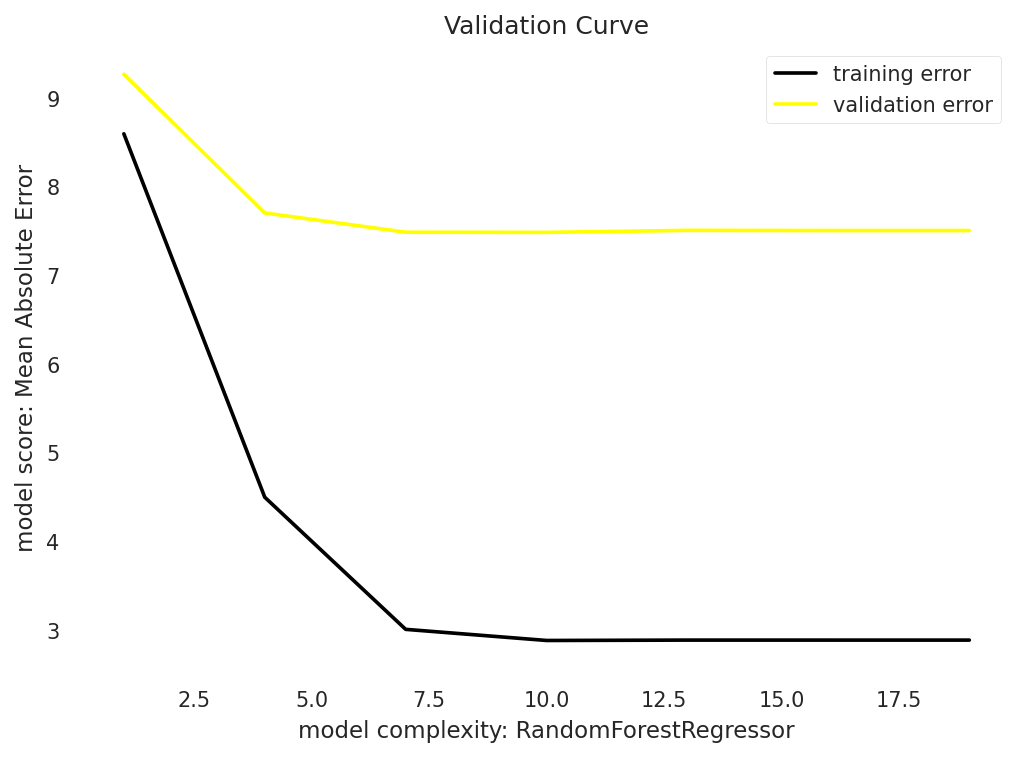

In [41]:
#Not a bad validation accuracy, but let's see if we can make it better.
from sklearn.model_selection import validation_curve
import numpy as np
depth = range(1, 20, 3)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='randomforestregressor__max_depth', 
    param_range=depth, scoring='neg_mean_absolute_error', 
    cv=3,
    n_jobs=-1
)

plt.figure(dpi=150)
plt.plot(depth, np.mean(-train_scores, axis=1), color='black', label='training error')
plt.plot(depth, np.mean(-val_scores, axis=1), color='yellow', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: RandomForestRegressor')
plt.ylabel('model score: Mean Absolute Error')
plt.legend();

In [42]:
#Now, last time I ran models, XGBoost was the best approach.
#Let's see if that still holds true.
from xgboost import XGBRegressor
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
print('Test MSE:',mse)
print('Test R^2:',r2)
print('Test RMSE:',rmse)

Test MSE: 92.53386334035619
Test R^2: 0.7068831784318838
Test RMSE: 9.619452340978471


In [43]:
#Hmm, doesn't seem to be the case today.
#Maybe with a search, it'll be better?
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    XGBRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)
search.fit(X_train, y_train)
pipeline = search.best_estimator_
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
print('Test MSE:',mse)
print('Test R^2:',r2)
print('Test RMSE:',rmse)
print('Test MAE:', mae)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[21:13:32] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:32] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test MSE: 92.54246365526348
Test R^2: 0.7068559354650485
Test RMSE: 9.61989935785523
Test MAE: 7.955232524871826


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0289s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


In [44]:
#I know I posted this same exact code in our search function above,
#that was simply to avoid the error.
#I'm reposting this here so I can get a closer look at our results.
y_pred = pipeline.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
print('Test MSE:',mse)
print('Test R^2:',r2)
print('Test RMSE:',rmse)
print('Test MAE:', mae)

Test MSE: 92.54246365526348
Test R^2: 0.7068559354650485
Test RMSE: 9.61989935785523
Test MAE: 7.955232524871826


In [45]:
#Let's try doing a search on our RFR!
#Let's see how good we can actually make our R^2.
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=30, 
    cv=20, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)
search.fit(X_train, y_train)

Fitting 20 folds for each of 30 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

RandomizedSearchCV(cv=20, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0cf8662d60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0cb9d41550>},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=10)

In [46]:
pipeline = search.best_estimator_
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
print('Test MSE:',mse)
print('Test R^2:',r2)
print('Test RMSE:',rmse)
print('Test MAE:', mae)

Test MSE: 81.10541599699019
Test R^2: 0.7430847379455572
Test RMSE: 9.005854540075038
Test MAE: 7.618140010249764


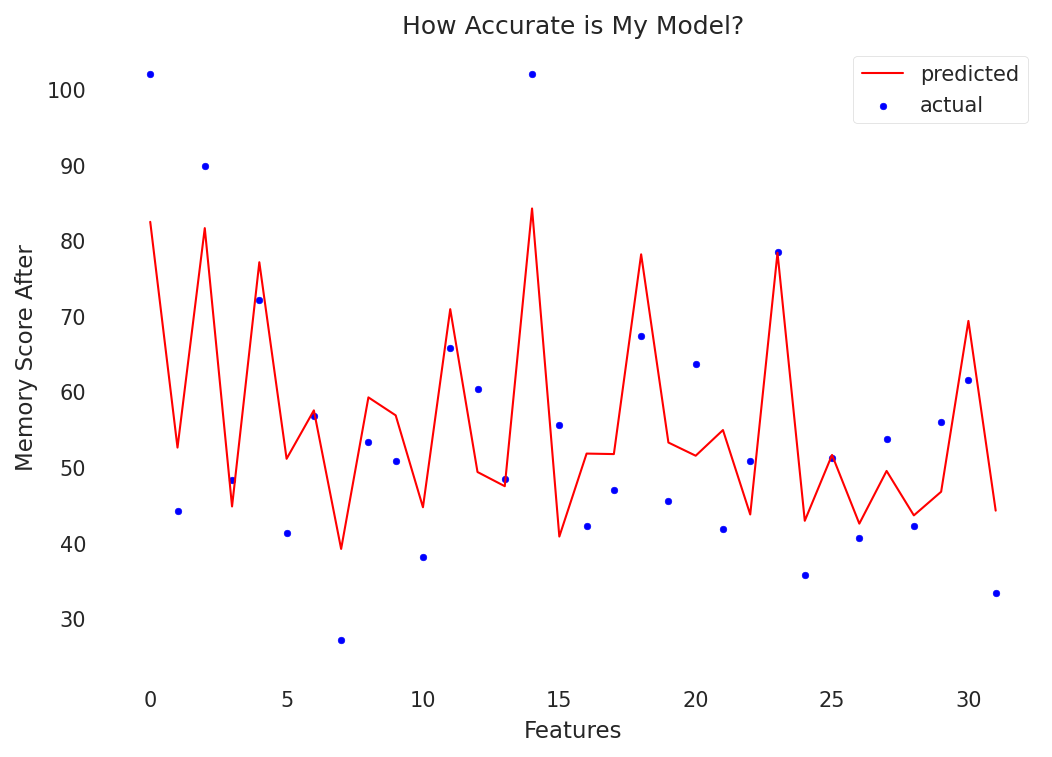

In [47]:
#That's not bad in all honesty; our R^2 beats our mean baseline,
#and our MAE is very low compared to what it is based on.
y_pred = pipeline.predict(X_val)
X_ax = range(len(y_val))
plt.figure(dpi=150)
plt.scatter (X_ax, y_val, s=10, color= 'blue', label= 'actual')
plt.plot(X_ax, y_pred, lw=1.0, color= 'red', label= 'predicted')
plt.title('How Accurate is My Model?')
plt.xlabel('Features')
plt.ylabel('Memory Score After')
plt.legend()
plt.show()

In [26]:
#This was on Jupyter, so I'm installing this just in case.
#pip install graphviz

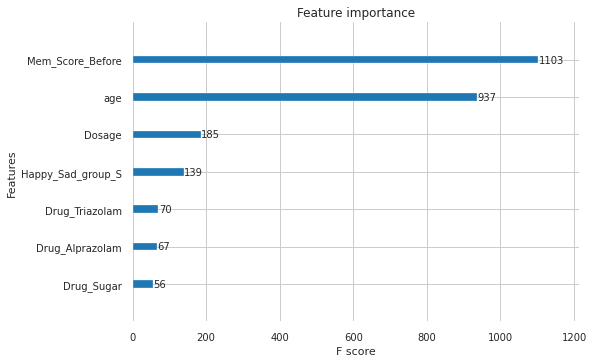

In [48]:
#Let's wrap this up and see what our most important features are.
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_jobs=-1,objective='reg:squarederror')
model_xgb.fit(X_train, y_train)
axsub = xgb.plot_importance(model_xgb)